In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
import pyodbc 
import plotly.express as px
import seaborn as sns
from tkinter import messagebox

In [3]:
try:
    conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};' +
                      'SERVER=DESKTOP-NC4C7PD\SQLEXPRESS;' +
                      'DATABASE=CarRentalDB;' +
                      'Trusted_Connection=yes')
    
    print('Connected to Database')
except pyodbc.Error as ex:
    print('Connection Failed')


Connected to Database


<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\user\AppData\Local\Temp\ipykernel_23768\3454981395.py:3: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=DESKTOP-NC4C7PD\SQLEXPRESS;' +


In [4]:
Vehicle_df = pd.read_sql("SELECT * FROM Vehicle;", conn)
Vehicle_Types_df = pd.read_sql("SELECT * FROM VehicleTypes;", conn)
Rental_df = pd.read_sql("SELECT * FROM Rental;", conn)
Branch_df = pd.read_sql("SELECT * FROM Branch;", conn)
Employee_df = pd.read_sql("SELECT * FROM Employee;", conn)
Customer_df = pd.read_sql("SELECT * FROM Customer;", conn)
Payment_df = pd.read_sql("SELECT * FROM Payment;", conn)

C:\Users\user\AppData\Local\Temp\ipykernel_23768\3238656299.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Vehicle_df = pd.read_sql("SELECT * FROM Vehicle;", conn)
C:\Users\user\AppData\Local\Temp\ipykernel_23768\3238656299.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Vehicle_Types_df = pd.read_sql("SELECT * FROM VehicleTypes;", conn)
C:\Users\user\AppData\Local\Temp\ipykernel_23768\3238656299.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Rental_df = pd.read_sql("SELECT * FROM Rental;", conn)
C:\Users\user

In [5]:
Rental_df.shape

(501, 7)

In [6]:
Payment_df.columns

Index(['PaymentID', 'RentalID', 'PaymentDate', 'Payment_Method'], dtype='object')

In [7]:
plt.style.use('ggplot')  
sns.set_theme()  

C:\Users\Halil Utku\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


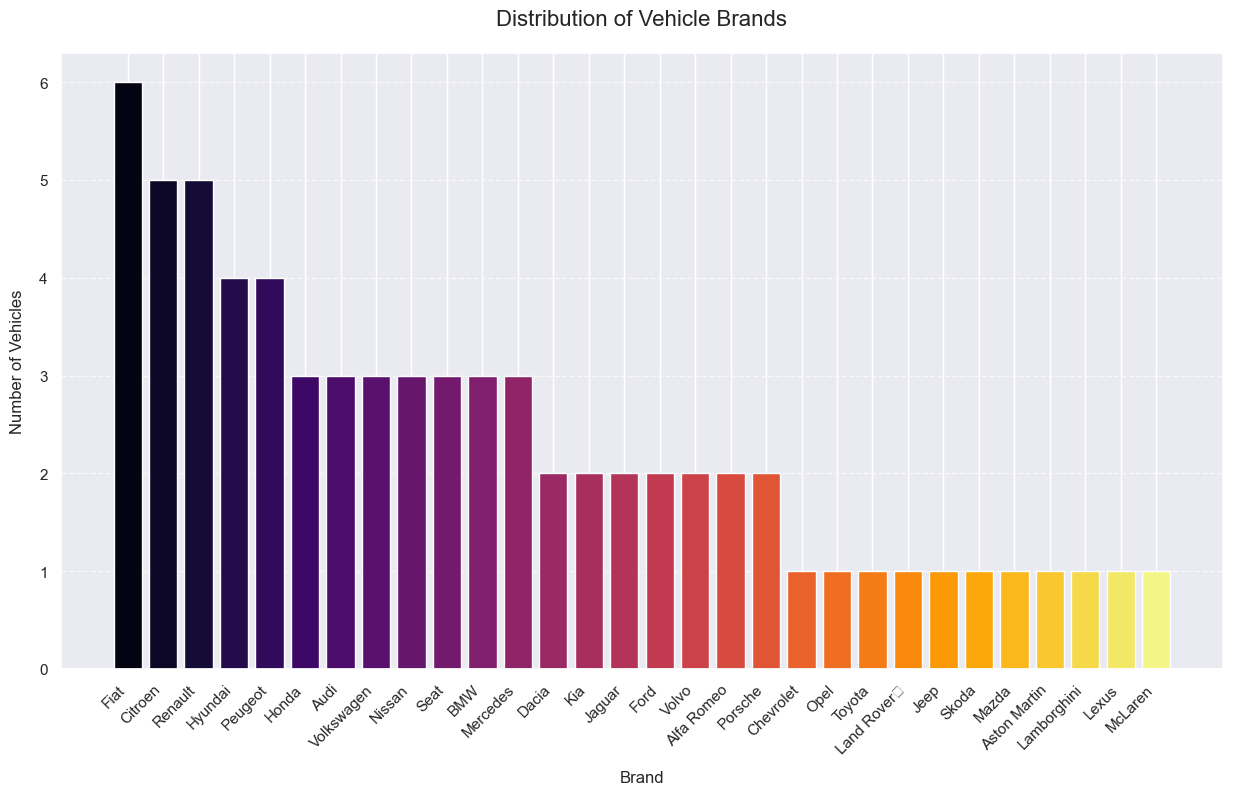

In [ ]:
# Distribution of Vehicle Brands
plt.figure(figsize=(15, 8))
brand_counts = Vehicle_df['Brand'].value_counts()
brand_percentages = (brand_counts / len(Vehicle_df) * 100).round(1)

colors = sns.color_palette("inferno", len(brand_counts))
bars = plt.bar(brand_counts.index, brand_counts.values, color=colors)

plt.title('Distribution of Vehicle Brands', fontsize=16, pad=20)
plt.xlabel('Brand', fontsize=12, labelpad=10)
plt.ylabel('Number of Vehicles', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

C:\Users\Halil Utku\AppData\Local\Temp\ipykernel_14304\2652443877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Vehicle_Type, x='SegmentID', y='VehicleID', palette='Reds')


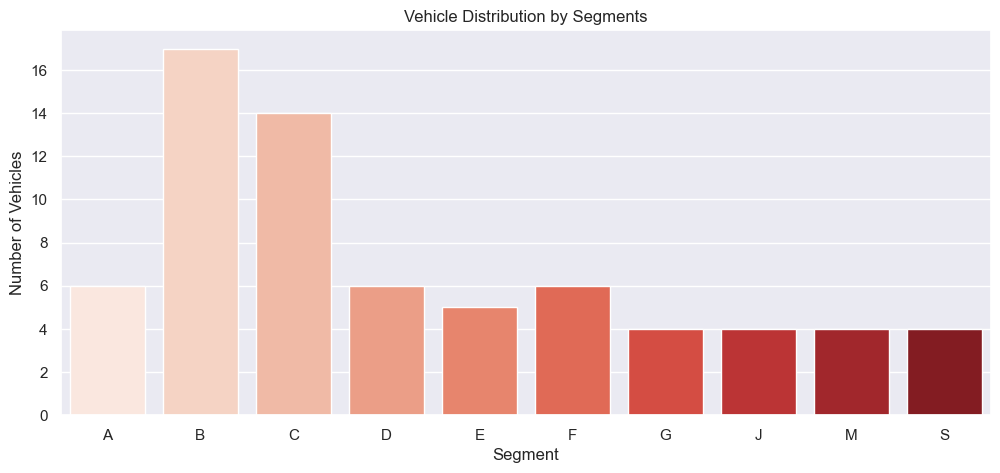

In [14]:
#Vehicle Distribution by Segments
Vehicle_Type = Vehicle_df.groupby('SegmentID')['VehicleID'].count().reset_index()

plt.figure(figsize=(12,5))
sns.barplot(data=Vehicle_Type, x='SegmentID', y='VehicleID', palette='Reds')
plt.title('Vehicle Distribution by Segments')
plt.xlabel('Segment')
plt.xticks(ticks=range(0,10), labels=[
    'A', 'B', 'C', 'D', 'E', 'F',
    'G', 'J', 'M', 'S'
])
plt.ylabel('Number of Vehicles')
plt.show()


C:\Users\Halil Utku\AppData\Local\Temp\ipykernel_14304\4100777621.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=branch_counts.values, y=branch_counts.index, palette="Set2")


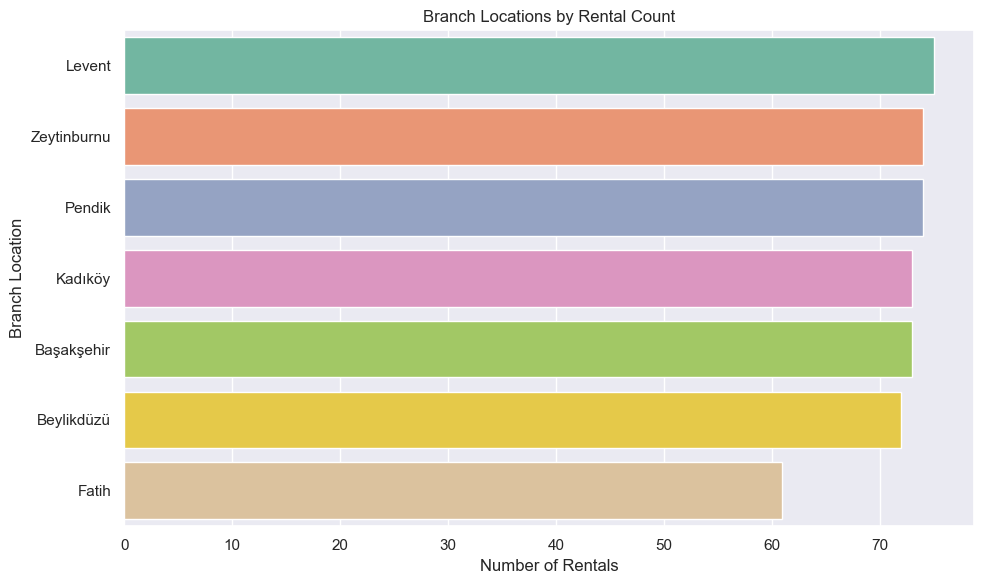

In [ ]:
#Branch Locations by Rental Count
branch_rentals = Rental_df.merge(Branch_df, on='BranchID')
branch_counts = branch_rentals['District'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=branch_counts.values, y=branch_counts.index, palette="Set2")
plt.title("Branch Locations by Rental Count")
plt.xlabel("Number of Rentals")
plt.ylabel("Branch Location")
plt.tight_layout()
plt.show()

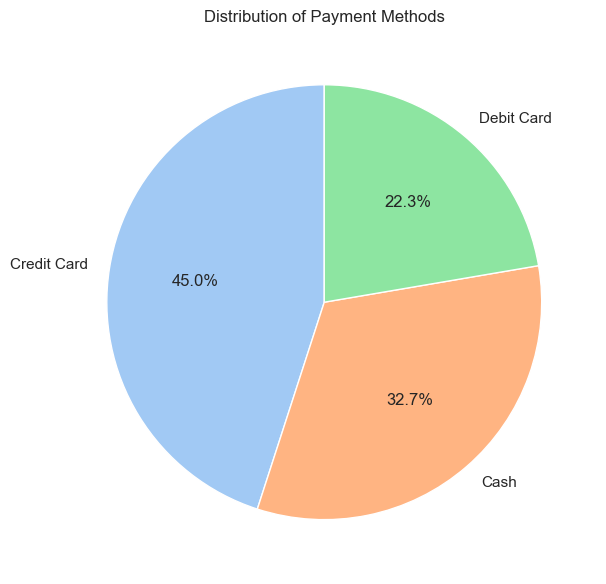

In [ ]:
#Distribution of Payment Methods
payment_counts = Payment_df['Payment_Method'].value_counts()

plt.figure(figsize=(8, 6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribution of Payment Methods")
plt.ylabel("")
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21432\1609342510.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




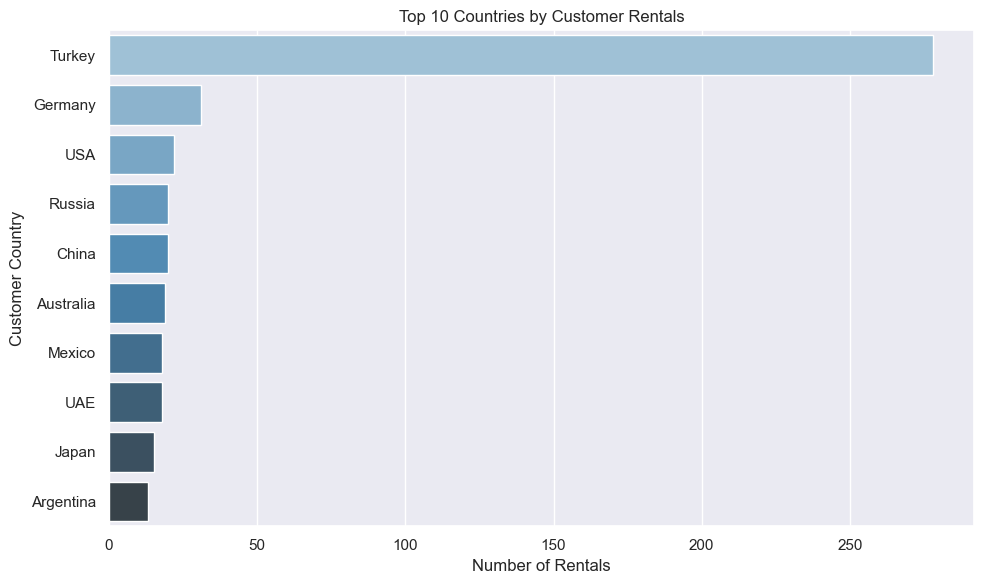

In [35]:
country_counts = Rental_df.merge(Customer_df, on='CustomerID')['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="Blues_d")
plt.title("Top 10 Countries by Customer Rentals")
plt.xlabel("Number of Rentals")
plt.ylabel("Customer Country")
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_21432\2920360444.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




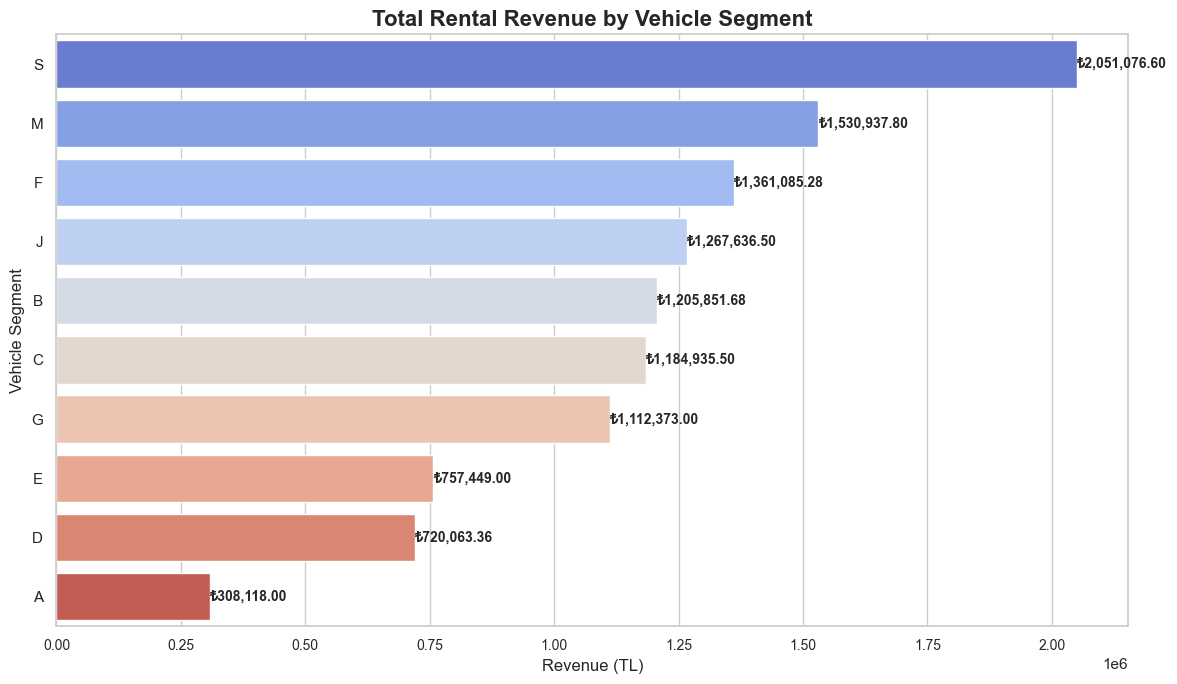

In [ ]:
#Total Rental Revenue by Vehicle Segment
rental_segment = Rental_df.merge(Vehicle_df, on='VehicleID') \
                          .merge(Vehicle_Types_df, on='SegmentID')

segment_revenue = rental_segment.groupby('SegmentLabel')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")

ax = sns.barplot(x=segment_revenue.values,
                 y=segment_revenue.index,
                 palette="coolwarm")

for i, v in enumerate(segment_revenue.values):
    ax.text(v + 50, i, f"₺{v:,.2f}", va='center', fontweight='bold', fontsize=10)

plt.title("Total Rental Revenue by Vehicle Segment", fontsize=16, fontweight='bold')
plt.xlabel("Revenue (TL)", fontsize=12)
plt.ylabel("Vehicle Segment", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()